<a href="https://colab.research.google.com/github/roitraining/PythonML/blob/Development/Ch04-DataPrep/04-01-DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Central Tendency
Pandas is a module that contains the DataFrame object.
Here we are looking at the three measures of central tendency and the count of how many objects in the DataFrame.
Then we show each unique value and how many times it occurs.

In [25]:
import pandas as pd
# Define a dict of column strips
df = pd.DataFrame({'Age':[9,10,10,11,11,11,12,12,12,13,13,13,13,14],
                   'Whatever':[1,2,2,3,4,3,3,5,6,3,2,5,3,1]}, columns=['Age','Whatever'])
print(df.Age.mode())
print ("Mean", df.Age.mean(), "Median", df.Age.median(), "Mode", df.Age.mode()[0], "Count", df.Age.count())
print (df.Age.value_counts())

display(df)

# Define rows, list of dict rows
df1 = pd.DataFrame([{'a':10,'b':20}, {'a':30, 'b':4}], index=['alpha', 'beta'])
display(df1)


print ('a', df.std(), 'b', df.Age.std(), 'c', df.Whatever.std())

print ('d', df.std(axis=1))

0    13
dtype: int64
Mean 11.714285714285714 Median 12.0 Mode 13 Count 14
13    4
12    3
11    3
10    2
14    1
9     1
Name: Age, dtype: int64


,Age,Whatever
0,9,1
1,10,2
2,10,2
3,11,3
4,11,4
5,11,3
6,12,3
7,12,5
8,12,6
9,13,3


,a,b
alpha,10,20
beta,30,4


a Age         1.437336
Whatever    1.491735
dtype: float64 b 1.4373357526806552 c 1.4917354742965407
d 0     5.656854
1     5.656854
2     5.656854
3     5.656854
4     4.949747
5     5.656854
6     6.363961
7     4.949747
8     4.242641
9     7.071068
10    7.778175
11    5.656854
12    7.071068
13    9.192388
dtype: float64


## Plotting
We can visualize what the data looks like with a number of different plots.
Boxplots are useful to see the big picture on a series of numbers.
We can see min, max, mean, and the inter quartile range.

## Box Plot
Shows the minimum, maximum, mean, and inter quartile range.

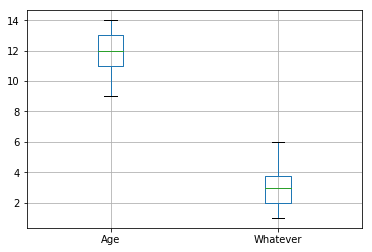

In [8]:
%matplotlib inline
import matplotlib as mp
from matplotlib import pyplot as plt
#plt.ylim(8,15)
df.boxplot()

#help(plt.show)
plt.show()


## Histogram
Good for looking at how many items fall within a range.

AttributeError: Unknown property type

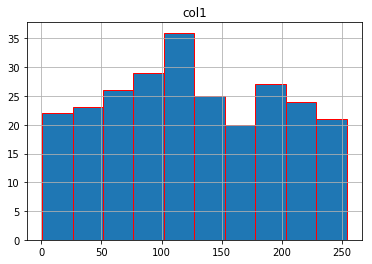

In [20]:
%matplotlib inline
import numpy as np
df = pd.DataFrame(np.random.rand(253, 1) * 254, columns=['col1'])
df.hist(histtype='bar', ec='red')
#plt.plot(df.col1, type = 'bar')
#help(plt.plot)

## Bar Chart
Useful for seeing how many items are in each category.

        Age
Gender     
Female    3
Male      2


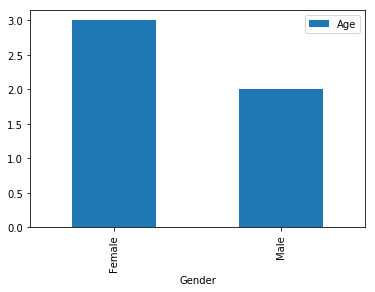

In [21]:
df = pd.DataFrame([('Male', 10),('Male', 11), ('Female', 11), ('Female', 12), ('Female', 12)], columns=['Gender','Age'])
x = df.groupby('Gender').count()
print (x)
x.plot(kind='bar')

## Replacing Null Values with the Central Tendency

In [49]:
import pandas as pd
fatal = pd.read_csv('2012_Workplace_Fatalities_by_State.csv')
print (fatal.columns)
fatal.columns = ['State', 'NumberOfFatalities', 'RateOfFatalities', 'StateRank', 'NumberOfInjuries', 'InjuriesRate', 'PenaltiesAvg', 'PenaltiesRank', 'Inspectors', 'YearsToInspectEachWorkplaceOnce', 'StateFederal']
print (fatal.columns)
#display(fatal)
#display(fatal.dropna(how='all', axis = 0)) # drop rows where all are null
fatal.dropna(how='all', axis = 0, inplace = True)
fatal = fatal[fatal.State != 'Total or National, Average']
fatal.NumberOfInjuries = fatal.NumberOfInjuries.fillna(0)
fatal.InjuriesRate = fatal.InjuriesRate.fillna(fatal.InjuriesRate.mean())

display(fatal)
#display (fatal.describe())
#fatal.describe().boxplot()
# print (fatal.PenaltiesRank[48:])
# print (fatal.PenaltiesRank[48:].isnull())
# fatal.PenaltiesRank = fatal.PenaltiesRank.fillna(fatal.PenaltiesRank.mean())
# print (fatal.PenaltiesRank[48:])
# fatal.dropna(axis = 0, inplace = True)
print (fatal.shape)

Index(['State', 'Number of Fatalities, 2012', 'Rate of Fatalities, 2012',
       'State Rank, Fatalities 2012', 'Number of Injuries/Illnesses 2012',
       'Injuries/Illnesses 2012 Rate', 'Penalties FY 2013 (Average $)',
       'Penalties FY 2013 (Rank)', 'Inspectors',
       'Years to Inspect Each Workplace Once', 'State or Federal Program'],
      dtype='object')
Index(['State', 'NumberOfFatalities', 'RateOfFatalities', 'StateRank',
       'NumberOfInjuries', 'InjuriesRate', 'PenaltiesAvg', 'PenaltiesRank',
       'Inspectors', 'YearsToInspectEachWorkplaceOnce', 'StateFederal'],
      dtype='object')


,State,NumberOfFatalities,RateOfFatalities,StateRank,NumberOfInjuries,InjuriesRate,PenaltiesAvg,PenaltiesRank,Inspectors,YearsToInspectEachWorkplaceOnce,StateFederal
0,"South Carolina\n(33.99882060100049, -81.045367...",63.0,3.5,25.0,36200.0,3.00000,492.0,49.0,24.0,111.0,State
1,"West Virginia\n(38.665511497000466, -80.712639...",49.0,6.9,46.0,19800.0,4.10000,1798.0,27.0,7.0,173.0,Federal
2,"Massachusetts\n(42.27687306500047, -72.0826898...",44.0,1.4,1.0,69700.0,3.10000,1929.0,21.0,33.0,123.0,Federal
3,"Tennessee\n(35.680943063000484, -85.7744864219...",101.0,3.8,30.0,65100.0,3.50000,727.0,45.0,30.0,82.0,State
4,"Oklahoma\n(35.472034350000456, -97.52106845499...",97.0,6.1,42.0,39000.0,3.60000,1872.0,24.0,19.0,131.0,Federal
5,"Illinois\n(40.48501278700047, -88.99770813999965)",146.0,2.5,10.0,124900.0,3.20000,1876.0,23.0,74.0,137.0,Federal
6,"Nebraska\n(41.64104043900045, -99.36571864599966)",48.0,5.2,38.0,24300.0,3.90000,2565.0,5.0,9.0,128.0,Federal
7,"Delaware\n(39.00883351400046, -75.57773943699965)",14.0,3.1,18.0,7900.0,2.80000,2406.0,6.0,5.0,175.0,Federal
8,"Hawaii\n(21.30485166200043, -157.85774691599974)",20.0,3.4,22.0,13700.0,3.80000,964.0,39.0,20.0,79.0,State
9,"Iowa\n(42.469404401000475, -93.81648936699969)",97.0,6.6,44.0,45600.0,4.50000,790.0,43.0,26.0,98.0,State


(50, 11)


## Add and Remove Columns to a DataFrame

In [65]:
print(pd.Categorical(fatal['StateFederal']))
print(pd.Categorical(fatal['StateFederal']).codes)


#print(fatal.columns)
#fatal.groupby('StateFederal').count()
# print (fatal.columns)
#fatal.drop(['ProgramType'], axis=1, inplace=True)
#fatal.StateFederal = pd.Categorical(fatal['StateFederal']).codes
fatal.insert(11, 'ProgramType', pd.Categorical(fatal['StateFederal']).codes)
#display(fatal)
# print (fatal[['ProgramType', 'StateFederal']][:5])
fatal.drop(['StateFederal'], axis=1, inplace=True)
# print (fatal.columns)
display(fatal)

[State, Federal, Federal, State, Federal, ..., State, Federal, Federal, Federal, State]
Length: 50
Categories (2, object): [Federal, State]
[1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 1]


,State,NumberOfFatalities,RateOfFatalities,StateRank,NumberOfInjuries,InjuriesRate,PenaltiesAvg,PenaltiesRank,Inspectors,YearsToInspectEachWorkplaceOnce,ProgramType
0,"South Carolina\n(33.99882060100049, -81.045367...",63.0,3.5,25.0,36200.0,3.00000,492.0,49.0,24.0,111.0,1
1,"West Virginia\n(38.665511497000466, -80.712639...",49.0,6.9,46.0,19800.0,4.10000,1798.0,27.0,7.0,173.0,0
2,"Massachusetts\n(42.27687306500047, -72.0826898...",44.0,1.4,1.0,69700.0,3.10000,1929.0,21.0,33.0,123.0,0
3,"Tennessee\n(35.680943063000484, -85.7744864219...",101.0,3.8,30.0,65100.0,3.50000,727.0,45.0,30.0,82.0,1
4,"Oklahoma\n(35.472034350000456, -97.52106845499...",97.0,6.1,42.0,39000.0,3.60000,1872.0,24.0,19.0,131.0,0
5,"Illinois\n(40.48501278700047, -88.99770813999965)",146.0,2.5,10.0,124900.0,3.20000,1876.0,23.0,74.0,137.0,0
6,"Nebraska\n(41.64104043900045, -99.36571864599966)",48.0,5.2,38.0,24300.0,3.90000,2565.0,5.0,9.0,128.0,0
7,"Delaware\n(39.00883351400046, -75.57773943699965)",14.0,3.1,18.0,7900.0,2.80000,2406.0,6.0,5.0,175.0,0
8,"Hawaii\n(21.30485166200043, -157.85774691599974)",20.0,3.4,22.0,13700.0,3.80000,964.0,39.0,20.0,79.0,1
9,"Iowa\n(42.469404401000475, -93.81648936699969)",97.0,6.6,44.0,45600.0,4.50000,790.0,43.0,26.0,98.0,1


## Change Data Type

In [67]:
# print (fatal.StateRank[48:])
# fatal.StateRank = fatal.StateRank.fillna(0).astype(int)
# print (fatal.StateRank[48:])
display(fatal)


,State,NumberOfFatalities,RateOfFatalities,StateRank,NumberOfInjuries,InjuriesRate,PenaltiesAvg,PenaltiesRank,Inspectors,YearsToInspectEachWorkplaceOnce,ProgramType
0,"South Carolina\n(33.99882060100049, -81.045367...",63.0,3.5,25,36200.0,3.00000,492.0,49.0,24.0,111.0,1
1,"West Virginia\n(38.665511497000466, -80.712639...",49.0,6.9,46,19800.0,4.10000,1798.0,27.0,7.0,173.0,0
2,"Massachusetts\n(42.27687306500047, -72.0826898...",44.0,1.4,1,69700.0,3.10000,1929.0,21.0,33.0,123.0,0
3,"Tennessee\n(35.680943063000484, -85.7744864219...",101.0,3.8,30,65100.0,3.50000,727.0,45.0,30.0,82.0,1
4,"Oklahoma\n(35.472034350000456, -97.52106845499...",97.0,6.1,42,39000.0,3.60000,1872.0,24.0,19.0,131.0,0
5,"Illinois\n(40.48501278700047, -88.99770813999965)",146.0,2.5,10,124900.0,3.20000,1876.0,23.0,74.0,137.0,0
6,"Nebraska\n(41.64104043900045, -99.36571864599966)",48.0,5.2,38,24300.0,3.90000,2565.0,5.0,9.0,128.0,0
7,"Delaware\n(39.00883351400046, -75.57773943699965)",14.0,3.1,18,7900.0,2.80000,2406.0,6.0,5.0,175.0,0
8,"Hawaii\n(21.30485166200043, -157.85774691599974)",20.0,3.4,22,13700.0,3.80000,964.0,39.0,20.0,79.0,1
9,"Iowa\n(42.469404401000475, -93.81648936699969)",97.0,6.6,44,45600.0,4.50000,790.0,43.0,26.0,98.0,1


## Rescale Data

In [68]:
from sklearn import preprocessing as pp
x = fatal.NumberOfFatalities.astype(float)
print (x.mean(), x.std(), x.min(), x.max())
print (x[10:15])
print (pp.scale(x, with_mean = False, with_std = False)[10:15])
print (pp.scale(x, with_mean = True, with_std = False)[10:15])
print (pp.scale(x, with_mean = False, with_std = True)[10:15])
print (pp.scale(x, with_mean = True, with_std = True)[10:15])

r = pp.scale(x, with_mean = True, with_std = True)
fatal.NumberOfFatalities = r
print ('rescaled', fatal.NumberOfFatalities[10:15])


92.34 92.01987584766896 8.0 536.0
10     60.0
11    218.0
12    149.0
13     88.0
14    137.0
Name: NumberOfFatalities, dtype: float64
[ 60. 218. 149.  88. 137.]
[-32.34 125.66  56.66  -4.34  44.66]
[0.65865284 2.39310532 1.63565456 0.96602417 1.50392399]
[-0.35501388  1.3794386   0.62198783 -0.04764256  0.49025726]
[-0.35501388  1.3794386   0.62198783 -0.04764256  0.49025726]
rescaled 10   -0.355014
11    1.379439
12    0.621988
13   -0.047643
14    0.490257
Name: NumberOfFatalities, dtype: float64


## Concat Data

In [74]:
df1 = pd.DataFrame([('Male', 10),('Male', 11), ('Female', 11), ('Female', 12), ('Female', 12)], columns=['Gender','Age'], index = range(1, 6))
df2 = pd.DataFrame([('Male', 20),('Male', 21), ('Female', 21), ('Female', 22)], columns=['Gender','Age'], index = range(10, 14))
display(df1)
display(df2)
df = pd.concat([df1, df2])
display (df)
df3 = pd.DataFrame([('John', 'Smith'), ('Joe','Average'), ('Jane', 'Doe'), ('Jill', 'Hill')], columns = ['First', 'Last'], index = range(1, 5))
display(df3)
df = pd.concat([df1, df3], axis = 1)
display (df)


,Gender,Age
1,Male,10
2,Male,11
3,Female,11
4,Female,12
5,Female,12


,Gender,Age
10,Male,20
11,Male,21
12,Female,21
13,Female,22


,Gender,Age
1,Male,10
2,Male,11
3,Female,11
4,Female,12
5,Female,12
10,Male,20
11,Male,21
12,Female,21
13,Female,22


,First,Last
1,John,Smith
2,Joe,Average
3,Jane,Doe
4,Jill,Hill


,Gender,Age,First,Last
1,Male,10,John,Smith
2,Male,11,Joe,Average
3,Female,11,Jane,Doe
4,Female,12,Jill,Hill
5,Female,12,NaN,NaN


## Merge or Join DataFrames

In [77]:
person_data = {
        'id': ['1', '2', '3', '4', '5'],
        'first_name': ['John', 'Sue', 'Jack', 'Alice', 'Joe'], 
        'last_name': ['Smith', 'Miller', 'Sprat', 'Wonderland', 'Blow']}
df1 = pd.DataFrame(person_data, columns = ['id', 'first_name', 'last_name'])
display(df1)

skill_data = {
    'id' : ['1', '1', '2', '3', '3', '3', '5', '6'],
    'skill' : ['C++', 'Java', 'Java', 'C++', 'Java', 'Python', 'Python', 'Java']
}
df2 = pd.DataFrame(skill_data, columns = ['id', 'skill'])
display(df2)

display (pd.merge(df1, df2, on = 'id'))
display (pd.merge(df1, df2, how = 'left' ))



,id,first_name,last_name
0,1,John,Smith
1,2,Sue,Miller
2,3,Jack,Sprat
3,4,Alice,Wonderland
4,5,Joe,Blow


,id,skill
0,1,C++
1,1,Java
2,2,Java
3,3,C++
4,3,Java
5,3,Python
6,5,Python
7,6,Java


,id,first_name,last_name,skill
0,1,John,Smith,C++
1,1,John,Smith,Java
2,2,Sue,Miller,Java
3,3,Jack,Sprat,C++
4,3,Jack,Sprat,Java
5,3,Jack,Sprat,Python
6,5,Joe,Blow,Python


,id,first_name,last_name,skill
0,1,John,Smith,C++
1,1,John,Smith,Java
2,2,Sue,Miller,Java
3,3,Jack,Sprat,C++
4,3,Jack,Sprat,Java
5,3,Jack,Sprat,Python
6,4,Alice,Wonderland,NaN
7,5,Joe,Blow,Python


In [78]:
from pandasql import sqldf

df4 = sqldf('select * from df1 join df2 on df1.id = df2.id')
display(df4)

,id,first_name,last_name,id,skill
0,1,John,Smith,1,C++
1,1,John,Smith,1,Java
2,2,Sue,Miller,2,Java
3,3,Jack,Sprat,3,C++
4,3,Jack,Sprat,3,Java
5,3,Jack,Sprat,3,Python
6,5,Joe,Blow,5,Python


## Convert Categorical Data

In [79]:
person_data = { 'id': ['1', '2', '3', '4', '5'],       
     'first_name': ['John', 'Sue', 'Jack', 'Alice', 'Joe'],        
     'status': ['Active', 'Active', 'Pending', 'Cancelled', 'Cancelled']}
df1 = pd.DataFrame(person_data, columns = ['id', 'first_name', 'status'])
display (df1)
df1.status = pd.Categorical(df1.status).codes
display (df1)

,id,first_name,status
0,1,John,Active
1,2,Sue,Active
2,3,Jack,Pending
3,4,Alice,Cancelled
4,5,Joe,Cancelled


,id,first_name,status
0,1,John,0
1,2,Sue,0
2,3,Jack,2
3,4,Alice,1
4,5,Joe,1


## Dummy Encoded

In [82]:
person_data = { 'id': ['1', '2', '3', '4', '5'],       
     'first_name': ['John', 'Sue', 'Jack', 'Alice', 'Joe'],        
     'status': ['Active', 'Active', 'Pending', 'Cancelled', 'Cancelled']}
df1 = pd.DataFrame(person_data, columns = ['id', 'first_name', 'status'])
display (df1)

dummies = pd.get_dummies(df1.status, drop_first = True)
df2 = pd.concat([df1[['id','first_name']], dummies], axis = 1)
display (df2)

dummies = pd.get_dummies(df1.status, drop_first = False)
df3 = pd.concat([df1[['id','first_name']], dummies], axis = 1)
display (df3)

print (pd.get_dummies(df1.status, prefix = 'x'))

,id,first_name,status
0,1,John,Active
1,2,Sue,Active
2,3,Jack,Pending
3,4,Alice,Cancelled
4,5,Joe,Cancelled


,id,first_name,Cancelled,Pending
0,1,John,0,0
1,2,Sue,0,0
2,3,Jack,0,1
3,4,Alice,1,0
4,5,Joe,1,0


,id,first_name,Active,Cancelled,Pending
0,1,John,1,0,0
1,2,Sue,1,0,0
2,3,Jack,0,0,1
3,4,Alice,0,1,0
4,5,Joe,0,1,0


   x_Active  x_Cancelled  x_Pending
0         1            0          0
1         1            0          0
2         0            0          1
3         0            1          0
4         0            1          0


## Split Data into Train and Test Sets

In [97]:
print ('Split 1')
train = fatal.sample(frac=0.8,random_state=130)
print(~fatal.index.isin(train.index))

test = fatal[~fatal.index.isin(train.index)]
x0 = fatal.ProgramType
x1 = train.ProgramType
x2 = test.ProgramType

print (x0.value_counts())
print (x0.value_counts()/x0.count())
print (x1.value_counts()/x1.count())
print (x2.value_counts()/x2.count())
print (fatal.shape, train.shape, test.shape)

from sklearn.model_selection import train_test_split
print ('Split 2')
x1, x2 = train_test_split(fatal, test_size=0.2)
print (x)
# x0 = fatal.ProgramType
# x1 = train.ProgramType
# x2 = test.ProgramType
# print (x0.value_counts()/x0.count())
# print (x1.value_counts()/x1.count())
# print (x2.value_counts()/x2.count())
# print (fatal.shape, train.shape, test.shape)


Split 1
[False False False False False False False False  True False  True  True
 False False False False  True  True False False False False False False
 False  True False False False  True False False False False False False
 False False  True False False False  True False  True False False False
 False False]
0    29
1    21
Name: ProgramType, dtype: int64
0    0.58
1    0.42
Name: ProgramType, dtype: float64
0    0.6
1    0.4
Name: ProgramType, dtype: float64
1    0.5
0    0.5
Name: ProgramType, dtype: float64
(50, 11) (40, 11) (10, 11)
Split 2
[                                                State  NumberOfFatalities  \
13  Missouri\n(38.63579372300046, -92.56629737199967)           -0.047643   
34      Ohio\n(40.06021029700048, -82.40425685299965)            0.753718   
48     Texas\n(31.827243635000457, -99.4267664729997)            4.870299   
26  Arkansas\n(34.748651751000466, -92.27448794899...           -0.322081   
44  Rhode Island\n(41.70828281900049, -71.52246918...      

In [98]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 

DIR = 'text'

def corpus_from_dir(folder):
    import os
    ret = dict(docs = [open(os.path.join(folder,f)).read() for f in os.listdir(folder)],
               ColNames = map(lambda x: x.split('.')[0], os.listdir(folder)))
    return ret

def tdm_df(docs, colNames = None, **kwargs):

    #initialize the  vectorizer
    vectorizer = CountVectorizer(**kwargs)
    x1 = vectorizer.fit_transform(docs)
    #create dataFrame
    df = pd.DataFrame(x1.toarray().transpose(), index = vectorizer.get_feature_names())
    if colNames is not None:
        df.columns = colNames

    return df

corpus = corpus_from_dir(DIR)
print (corpus)
df = tdm_df(docs = corpus['docs'], colNames = corpus['ColNames'], stop_words = 'english')  
print (df)


{'docs': ['  Once upon a midnight dreary, while I pondered, weak and weary,\n  Over many a quaint and curious volume of forgotten lore--\n  While I nodded, nearly napping, suddenly there came a tapping,\n  As of some one gently rapping, rapping at my chamber door.\n  "\'Tis some visitor," I muttered, "tapping at my chamber door--\n                                     Only this and nothing more."\n\ndeath\ndisease\ndisease\n\n', 'THE thousand injuries of Fortunato I had borne as I best could; but\nwhen he ventured upon insult, I vowed revenge. You, who so well know the\nnature of my soul, will not suppose, however, that I gave utterance to\na threat. _At length_ I would be avenged; this was a point definitively\nsettled--but the very definitiveness with which it was resolved,\nprecluded the idea of risk. I must not only punish, but punish with\nimpunity. A wrong is unredressed when retribution overtakes its\nredresser. It is equally unredressed when the avenger fails to make\nhimself fe

#End of notebook